<a href="https://colab.research.google.com/github/OviedoMarco/Mineria_de_datos/blob/DataSets/Tecnicas_PIA_II_Grupo002_Equipo09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 09

**Grupo: 002**

*Luis Adrian Navarro García 1866581*

*Marco Antonio Oviedo Acevedo 1851698*

*Nayelli Alondra Allende Gaona 1860995*

*Eliud Moreno Narvaez 1863955*

# **Credit Card Fraud Detection**

## Esquema:

**A) Introducción General.**

I.- Descripción de los datos.

II.- Justificación del uso de datos.

III.- Objetivo Final.

IV.- Preguntas de Interes

**B) Estructuración de los Datos.**

I.- Carga del Dataset y Liberias.

II.- Resumen

**C) Exploraty Data Analysis (EDA)**

I.- Limpieza de Datos.

II.- Estadisticas Basicas.

III.- Graficas.

IV.- ¿Qué sigue por hacer?

**D) Pre-Procesamiento de los Modelos**

I.- Escalamiento de las variables.

II.- División de los Datos (Marco de Datos Original).

III.- Submuestreo Aleatorio.

IV.- Distribuir y correlacionar equitativamente

V.- Eliminación de los valores atipicos

**E) Validación de Modelos**

I.- Reducción de dimensionalidad y agrupación.

II.- Validación de modelos de clasificación.

III.- Conclusiones.

##  Introducción General.

En resumidas cuentas, un fraude con tarjeta de crédito es un hecho mediante el cual unos delincuentes realizan operaciones como consumos en establecimientos físicos o virtuales, adelantos de efectivo, entre otras, para lo cual se aprovechan de la línea de crédito de los consumidores afectados. Un fraude con tarjeta de crédito puede ocurrir mediante el hurto o el robo de la tarjeta física y el PIN o clave secreta, o del único conocimiento de los datos confidenciales de esta, es decir su numeración completa, la fecha de vencimiento y el código CVV. En dicha medida, estos delincuentes pueden aprovechar y acumular diversos cargos con cargo a la línea de la tarjeta de crédito.

La predicción del fraude, y es que el comportamiento malicioso o fraude sigue patrones específicos y, por lo tanto, se puede predecir con base en ellos. A través del aprendizaje supervisado, se puede clasificar como fraudulenta o legítima a través de datos con una etiqueta clara sobre una pregunta base. Si la empresa financiera tiene acceso a todas las transacciones que se realizan con sus tarjetas, puede crear grandes conjuntos de datos y marcar los fraudes como tal. Así el machine learning, cuando vea algo similar lo detectará como fraude

### I. Descripción de los Datos.

**a) Que tipo de datos son.**

Es un DataSet en csv que contiene transacciones 284.807 transacciones y solo contiene variables numericas

**b) Descripcion de las columnas.**

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Importe' es el Importe de la transacción; esta función se puede utilizar para el aprendizaje dependiente de los costes por ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

### II. Justificación del Uso de Datos.

La base de datos viene ordenada de una manera practica y muy útil, lo que nos permitira realizar analisis con mayor facilidad y si se llega a requerrir el uso de modelos matematicos sera de una manera muy directa puesto que no contiene variables categoricas. Por otra parte la caracteristica que contendra la variable respuesta ya esta transformada en 1 en caso de fraude y 0 en caso contrario haciendonos ahorrar tiempo y esfuezo en el codigo

### III. Objetivo Final.

**Objetivo Principal.**

Reducir el impacto de las transacciones fraudulentas

**Objetivos Secundarios.**

*   Aumentar la precisión de la detección de transacciones fraudulentas
*   Reducción los falsos positivos puesto que esto puede ocasionar una quejas sobre la financiera




### IV. Preguntas de Interes.

*   ¿Que variables nos ayudan a encontrar cuando una variable es frauduluenta?
*   ¿Tenemos datos sesgados? y si lo son ¿podemos trabajar con ellos?





---



## Estructuración de los Datos

### I. Carga del Dataset y Librerias

Importamos la libreria de **google.colab** para poder manipular nuestra base de datos que guardamos en nuestro drive

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


Leemos nuestra base de datos con la libreria pandas

In [3]:
import pandas as pd
pd.read_csv('/gdrive/MyDrive/creditcard.csv')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Es momento de cargar las librerias que se usaremos en este notebook para poder tratar los datos; de igual asiganeremos un nombre a nuestro dataframe.

In [4]:
# cargamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import numpy as np # lineal algebra
import pandas as pd # Procesamiento de datos
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Librerias de Clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Otras Librerias
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Desactivar las advertencias para el cuaderno final
import warnings
warnings.filterwarnings('ignore')

# Carga de nuestro dataframe
df = pd.read_csv('/gdrive/MyDrive/creditcard.csv')
print(df.info())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observamos que nuestra base de datos cuenta con 284806 filas y 31 variables de las cuales:


*   **30 variables son flotantes**
*   **1 variable es entero**



### II. Resumen

Nuestra base de datos representa los datos de los clientes que han entrado a la financiera y han realizado transacciones, dandonos el dato importante de "Amount" (Monto) y "Class" (Si hubo fraude):
Contamos con 284806 transacciones y 31 columnas de las cuales tenemos una variables entera y 30 variables flotantes; viendolo de esta manera tenemos puras variables numericas por la razón de que la financiera proporciono una base de datos sin información personal del cliente por confidencialidad .
Esto sera un reto para nosotros pues teniendo en cuenta el punto anterior tenemos que determinar los factores y caracteristicas de la insidencia de fraude sin variables categoricas.


---

## Analisis Exploratorio Detallado de los Datos (EDA)

### I. Limpieza de Datos.

Para empezar con la limpieza de datos, veamos los primeros datos de nuestro dataframe para darnos una idea de como vamos a manipular nuestros datos.

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vemos que por el momento no es conveniente eliminar ninguna columna pues aun no sabemos que información sera relevante para nuestro analisis

Veamos si estamos tratando con datos nulos y si es asi veamos en donde se encuentran y cuantas son para poder tratarlas

In [6]:
plt.style.use('bmh')
# valores nulos
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

vemos que no contamos con valore nulos, esto nos ahorrara mucho trabajo 

Para poder dar una vista previa de los datos que nos ayudara en un futuro veamos si contamos con outliers en nuestras variables

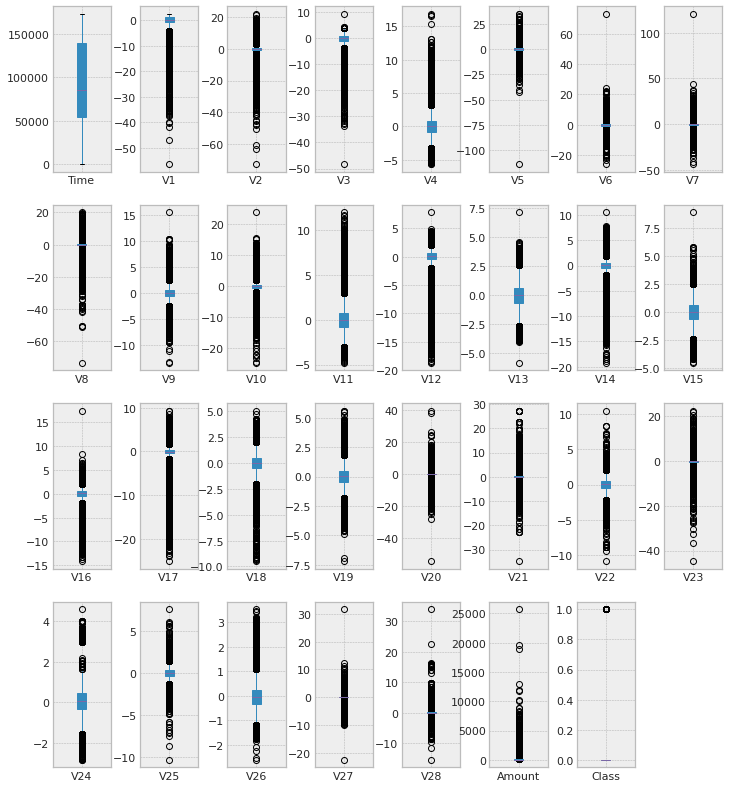

In [7]:
df_to_plot = df.drop(columns=[]).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(4,8), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Vemos que tenemos muchas variables que cuentan con outliers, entonces ya tenemos que contar con la idea que utilizaremos tecnicas para manipular estas variables

**Resumen:**

Vimos que tenemos un dataframe muy limpio y no tuvimos que manipularlo por el momento.

A como avanzando con la manipulación de los datos veremos que variables son las mas importantes y de ahi podremos seleccionar solo ciertas columnas por el momento solo hemos conseguido información de la data

### II. Estadisticas Basicas.

Analizemos el comportamiento de nuestras variables obteniendo:



*   Total de datos
*   Promedio
*   Desviación Estandar
*   Minimos, Maximos y Cuartiles



In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Un dato curioso es cuando vemos que el promdio del monto de las transacciones es de tan solo $88

Un dato que tenemos que saber antes de empezar con los siguientes analisis es comprender que tan dificil sera encontrar las transacciones fraudulentas.
Esto lo podremos observar con la cantidad de datos que trabajermos

In [9]:
print('Transacciones Efectivas:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Transacciones Fraudulentas:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

Transacciones Efectivas: 99.83 %
Transacciones Fraudulentas: 0.17 %


Con los resultados anteriores pdoemos ver que estaremos trabajando con datos muy sesgados 

Text(0.5, 1.0, 'Distribución de las transacciones efectivas y no efectivas \n (0: Efectivas || 1: Fraudulentas)')

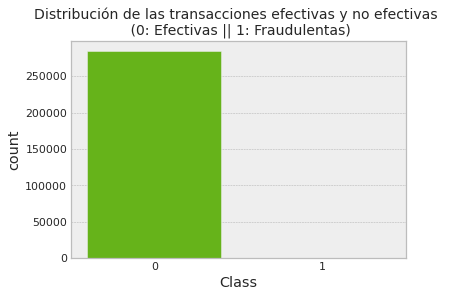

In [10]:
colors = ["#66CD00", "#FF4040"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Distribución de las transacciones efectivas y no efectivas \n (0: Efectivas || 1: Fraudulentas)', fontsize=14)

Debido a lo que vimos anteriormente de los datos que podrian estar sesgados con esta grafica podemos determinar que sera dificil encontrar un modelo que nos permita determinar las transacciones fraudulentas por la poca información que tenemos

Demos un vistazo a la simetria y curtosis de nuestra  variable "Amount"

Skewness: 16.977724
Kurtosis: 845.092646


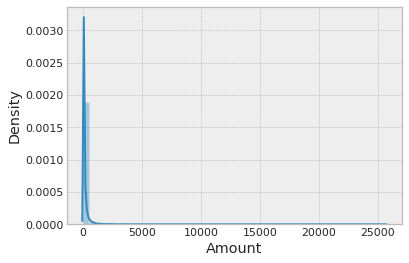

In [11]:
sns.distplot(df['Amount']);
print("Skewness: %f" % df['Amount'].skew())
print("Kurtosis: %f" % df['Amount'].kurt())

*   Asimetria Postiva
*   Altamente leptocurtica



Obtenemos la asimetria y curtosis de las variables faltantes

In [12]:
variables_numericas = df.dtypes[df.dtypes != "object"].index

In [13]:
for col in variables_numericas:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

Time            Skewness: -0.04     Kurtosis: -01.29
V1              Skewness: -3.28     Kurtosis: 032.49
V2              Skewness: -4.62     Kurtosis: 095.77
V3              Skewness: -2.24     Kurtosis: 026.62
V4              Skewness: 00.68     Kurtosis: 002.64
V5              Skewness: -2.43     Kurtosis: 206.90
V6              Skewness: 01.83     Kurtosis: 042.64
V7              Skewness: 02.55     Kurtosis: 405.61
V8              Skewness: -8.52     Kurtosis: 220.59
V9              Skewness: 00.55     Kurtosis: 003.73
V10             Skewness: 01.19     Kurtosis: 031.99
V11             Skewness: 00.36     Kurtosis: 001.63
V12             Skewness: -2.28     Kurtosis: 020.24
V13             Skewness: 00.07     Kurtosis: 000.20
V14             Skewness: -2.00     Kurtosis: 023.88
V15             Skewness: -0.31     Kurtosis: 000.28
V16             Skewness: -1.10     Kurtosis: 010.42
V17             Skewness: -3.84     Kurtosis: 094.80
V18             Skewness: -0.26     Kurtosis: 

*   Tiempo es platicurtica



### III. Graficas.

Tomando en cuenta la parte de Estaditicas Basicas, no interesa ver el comportomaiento del tiempo de nuestros datos pues es la unica variable platicurtica

Skewness: -0.035568
Kurtosis: -1.293530


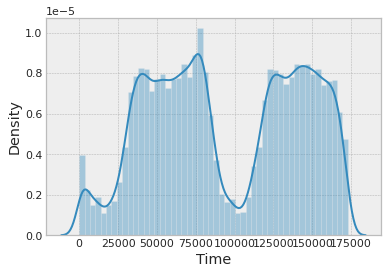

In [14]:
sns.distplot(df['Time']);
print("Skewness: %f" % df['Time'].skew())
print("Kurtosis: %f" % df['Time'].kurt())

Observamos algo interesante en el comportamineto del tiempo pues simplente se comporta muy desordenadamente

Como anteriormente obtuvimos las correlaciones de nuestras variables, veamos una matriz de correlacion de todas nuestras variables; esto nos ayudara a escoger las variables más determinantes

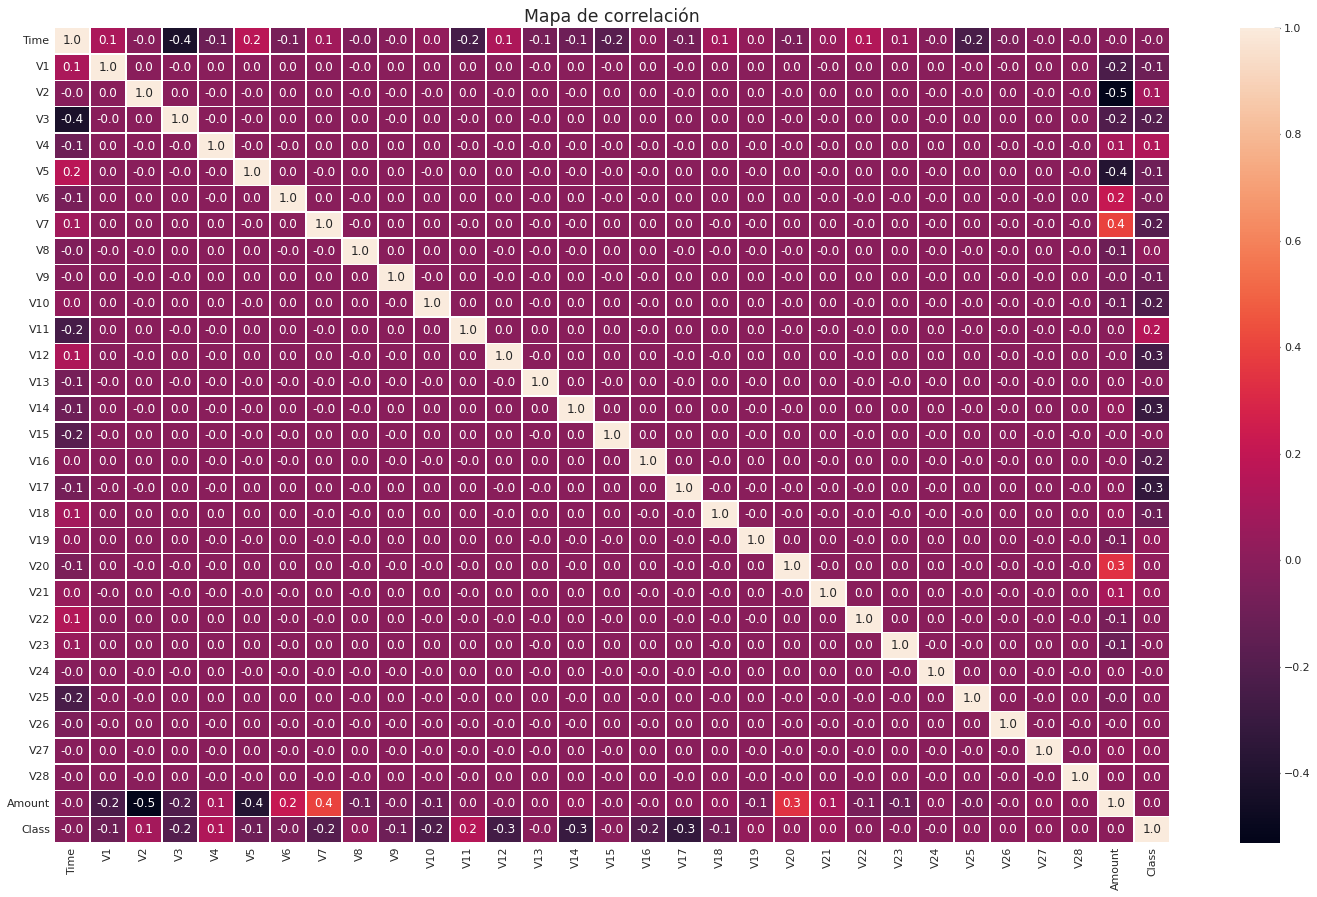

In [15]:
f,ax=plt.subplots(figsize = (25,15))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Viendo la matriz de correlacion aun no tenemos nada claro, aqui no podemos determinar aun que variables son las que tiene el peso necesario para predecir una transaccion fraudulenta, esto ya nos dirije a que tendremos que no solo ajustar los datos de la variable si no que tendremoq ue trabajar con las variables  Amount y Time pues no tenemos ninguna relacion con esta y viendo la siguiente grafica podemos observar que no tiene consistencia y simetria, como anteriormente lo mencionamos

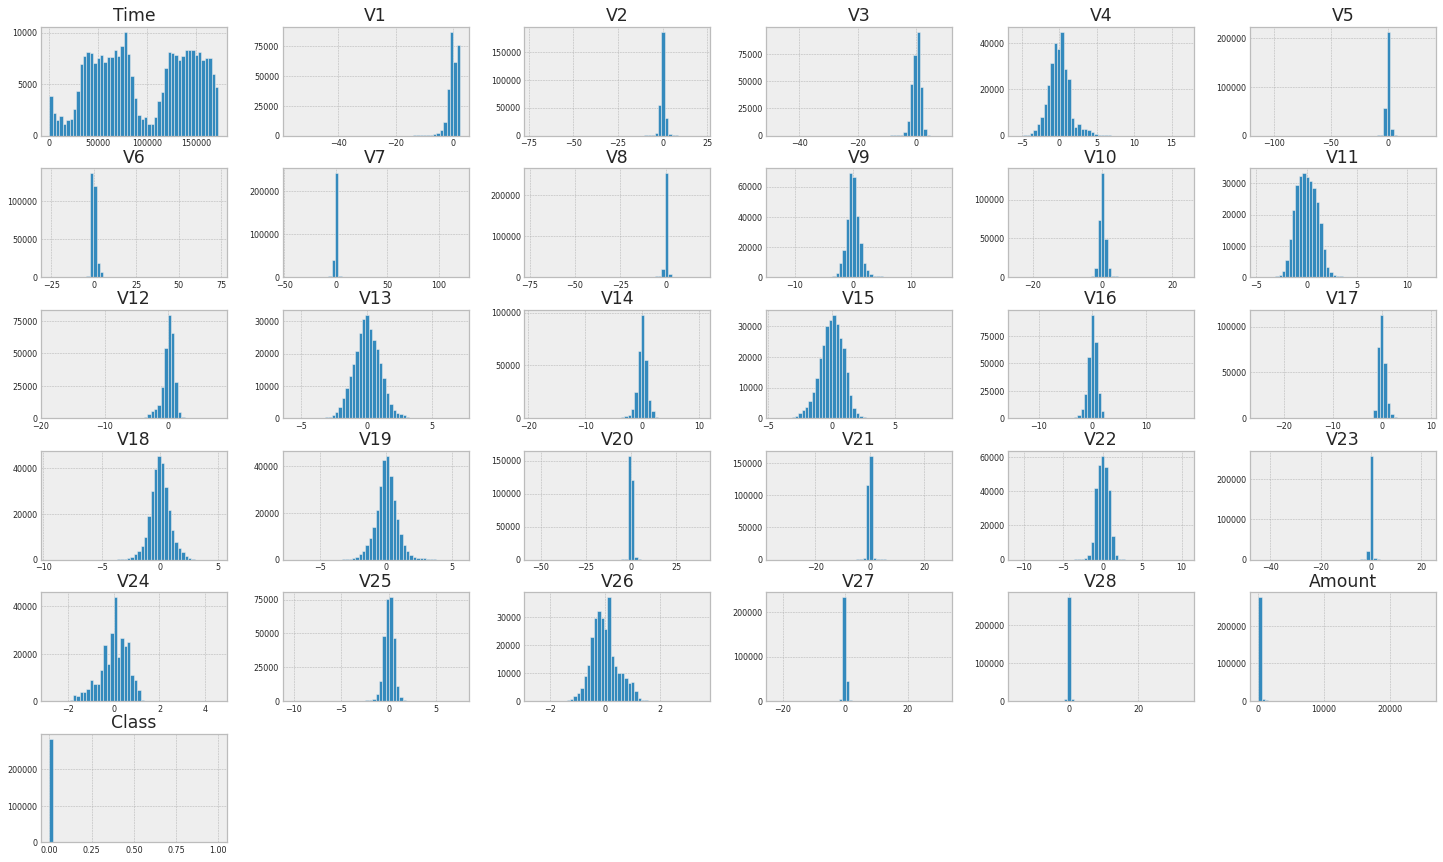

In [16]:
df.hist(figsize=(25, 15), bins=50, xlabelsize=8, ylabelsize=8); 

Aqui nos podemos dar una idea de que variables nos pueden ayudar en un futuro y con que variables tenemos que trabjar en ajustar como lo observamos con Amount y Time que son variables que sabemos que tenemos que utilizar pero no tienen la distribucion normal o distribucion t (solo si la muestra es pequeña)

### IV.- Conclusiones.

Vemos que nos encontramos con datos muy sesgados, esto nos provoca problemas al concluir preguntas o no tener un concepto de la solucion de nuestra problematica, vemos una base de datos desordenada y con la matriz de correlacion observamos variables muy poco correlacionadas que no nos brindan mucha informacion acerca de que variables utilizaremos.
Pero esto no es un problema grave pues hay que tener en cuenta que tenemos la facilidad de usar modelos para resolver este tipo de problematicas.
Para el siguiente paso que sera el pre procesamiento de los modelos a utilizar podremos hechar una vista previa a la hroa de ajustar la muestra a analizar, utilizando tecnicas como RobutScaler y Escalamiento para poder tratar los datos y tener modelos menos sesgados

### V.- ¿Que sigue por hacer?

**Escalado y distribución:**

*Las variables "Time" y "Amount" se deben escalar como las otras columnas. Por otro lado, también necesitamos crear una submuestra del marco de datos para tener la misma cantidad de casos de fraude y no fraude, ayudando a nuestros algoritmos a comprender mejor los patrones que determinan si una transacción es un fraude o no.*

**¿Qué es una submuestra?**

*En este escenario, nuestra submuestra será un marco de datos con una proporción de 50/50 de transacciones fraudulentas y no fraudulentas. Lo que significa que nuestra submuestra tendrá la misma cantidad de transacciones fraudulentas y no fraudulentas.*

**¿Por qué creamos una submuestra?**

 *Al principio vimos que el marco de datos original estaba muy desequilibrado. El uso del marco de datos original provocará los siguientes problemas:
Sobreajuste.*

*Nuestros modelos de clasificación supondrán que en la mayoría de los casos no hay fraudes, lo que queremos para nuestro modelo es estar seguros de cuándo ocurre un fraude.*

*Correlaciones incorrectas: aunque no sabemos qué significan las características "V", será útil comprender cómo cada una de estas características influye en el resultado (fraude o no fraude) al tener un marco de datos de desequilibrio que no podemos ver el verdaderas correlaciones entre la clase y las características.*


## Pre-Procesamiento de los Modelos

### I.- Escalamiento de las variables

Como vimos con el EDA la mayoria de nuestros datos ya se encuentran escaladas (observe la grafica de frecuencia). Las variables importantes y que no han sido trabajadas son las variables Amount y Time. 
Debido a esto tenemos que escalar estas columnas

In [17]:
# Escalamos las variables Time y Amount
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler es menos propenso a valores atípicos..

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [18]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Mostramos el tiempo y monto escalados

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### II.- División de los datos (marco de datos original)

Antes de continuar con la técnica de submuestreo aleatorio, tenemos que separar el marco de datos original. 

¿Por qué? 

Para propósitos de prueba, tomando en cuetna que aunque estamos dividiendo los datos cuando implementamos técnicas de Submuestreo Aleatorio o Sobremuestreo, queremos probar nuestros modelos en el conjunto de prueba original, no en el conjunto de prueba creado por cualquiera de estas técnicas. El objetivo principal es ajustar el modelo con los marcos de datos que fueron submuestreos y sobremuestreos (para que nuestros modelos detecten los patrones) y probarlo en el conjunto de prueba original.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Efectivas', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% del dataset')
print('Fraudulentas', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% del the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Ya tenemos X_train e y_train para datos de muestra insuficiente, por eso estoy usando original para distinguir y no sobrescribir estas variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos la distribucion de las columnas


# Convertimos en Matriz
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Veamos si tanto la distribución de etiquetas de prueba como la de entrenamiento están distribuidas de manera similar
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('distribución de etiquetas: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Efectivas 99.83 % del dataset
Fraudulentas 0.17 % del the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
distribución de etiquetas: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### III.- Submuestreo aleatorio

*En esta tercer parte del pre-procesamiento de los modelos implementaremos "Random Under Sampling" que básicamente consiste en eliminar datos para tener un conjunto de datos más equilibrado y así evitar el sobreajuste de nuestros modelos.*

**Pasos:**

*Lo primero que tenemos que hacer es determinar qué tan desequilibrada está nuestra clase (use "value_counts ()" en la columna de la clase para determinar la cantidad de cada etiqueta)*

*Una vez que determinamos cuántas instancias se consideran transacciones fraudulentas (Fraud = "1"), debemos llevar las transacciones no fraudulentas a la misma cantidad que las transacciones fraudulentas (asumiendo que queremos una proporción de 50/50), esto será equivalente a 492 casos de fraude y 492 casos de transacciones sin fraude.*

*Después de implementar esta técnica, tenemos una submuestra de nuestro marco de datos con una proporción de 50/50 con respecto a nuestras clases. Luego, el siguiente paso que implementaremos es mezclar los datos para ver si nuestros modelos pueden mantener una cierta precisión cada vez que ejecutamos este script.*

**Nota:** *El problema principal con el "submuestreo aleatorio" es que corremos el riesgo de que nuestros modelos de clasificación no funcionen con la precisión que nos gustaría, ya que hay una gran pérdida de información (lo que genera 492 transacciones sin fraude de 284,315 transacción sin fraude)*

In [20]:
# Dado que nuestras clases están muy sesgadas, deberíamos hacerlas equivalentes para tener una distribución normal de las clases.

# Vamos a mezclar los datos antes de crear las submuestras

df = df.sample(frac=1)

# Monto de clases de fraude 492 filas..
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Mezclar filas de dataframes
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
165359,0.011318,0.384015,-0.062757,1.093733,-0.965853,-0.556310,0.498898,-0.047040,0.193505,0.427758,0.136420,-1.023064,0.703659,1.172825,0.911323,-1.042477,-0.677939,0.704741,0.076170,0.970886,-0.218454,-0.263820,0.165497,0.404739,0.115138,0.198210,-0.735960,-0.575485,-0.280819,-0.026952,0
154718,-0.307413,0.211198,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,-4.508167,-7.334377,7.188724,-10.655181,2.594680,-10.242859,-0.191158,-5.504334,-8.697777,-1.934225,1.958750,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,1
152085,-0.139454,0.142753,0.235305,1.225828,-1.159638,-0.584467,1.626403,-1.301544,1.588290,-0.571854,0.912050,-1.621840,-0.223578,-2.643086,1.979377,0.561213,-1.251297,-0.309863,1.224086,0.452387,-0.061962,-0.145145,-0.056384,0.275792,-0.414408,-0.741988,0.324881,0.195320,-0.016322,0.031342,0
152223,-0.186683,0.146019,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,-16.601197,5.569258,-13.932249,-0.204855,-7.581023,-1.013612,-9.014813,-16.092032,-6.050148,1.661029,2.419921,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,1
31002,1.253406,-0.570049,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,3.676703,-7.642983,1.689865,-8.299660,0.646996,-6.792795,-12.075932,-4.882180,2.626625,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1


### IV.- Distribuir y correlacionar equitativamente:

Ahora que tenemos nuestro marco de datos correctamente equilibrado, podemos ir más allá con nuestro análisis y preprocesamiento de datos.

Distribución de las clases en el conjunto de datos de submuestra
1    0.5
0    0.5
Name: Class, dtype: float64


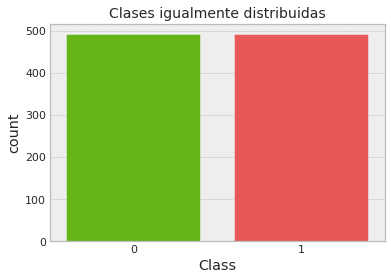

In [21]:
print('Distribución de las clases en el conjunto de datos de submuestra')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Clases igualmente distribuidas', fontsize=14)
plt.show()

**Matrices de correlación**

Las matrices de correlación son la esencia de la comprensión de nuestros datos. Queremos saber si hay características que influyan mucho en si una transacción específica es un fraude. Sin embargo, es importante que usemos el marco de datos correcto (submuestra) para que podamos ver qué características tienen una alta correlación positiva o negativa con respecto a las transacciones fraudulentas.

**Resumen y explicación:**

**Correlaciones negativas:**

V17, V14, V12 y V10 están correlacionadas negativamente. Observe que cuanto más bajos son estos valores, es más probable que el resultado final sea una transacción fraudulenta.

**Correlaciones positivas:**

 V2, V4, V11 y V19 están correlacionadas positivamente. Observe que cuanto más altos son estos valores, más probable es que el resultado final sea una transacción fraudulenta.

**BoxPlots:**

Usaremos boxplots para comprender mejor la distribución de estas características en transacciones fradulentas y no fradulentas.

**Nota:**

Tenemos que asegurarnos de usar la submuestra en nuestra matriz de correlación o, de lo contrario, nuestra matriz de correlación se verá afectada por el alto desequilibrio entre nuestras clases. Esto ocurre debido al desequilibrio de clase alta en el marco de datos original.

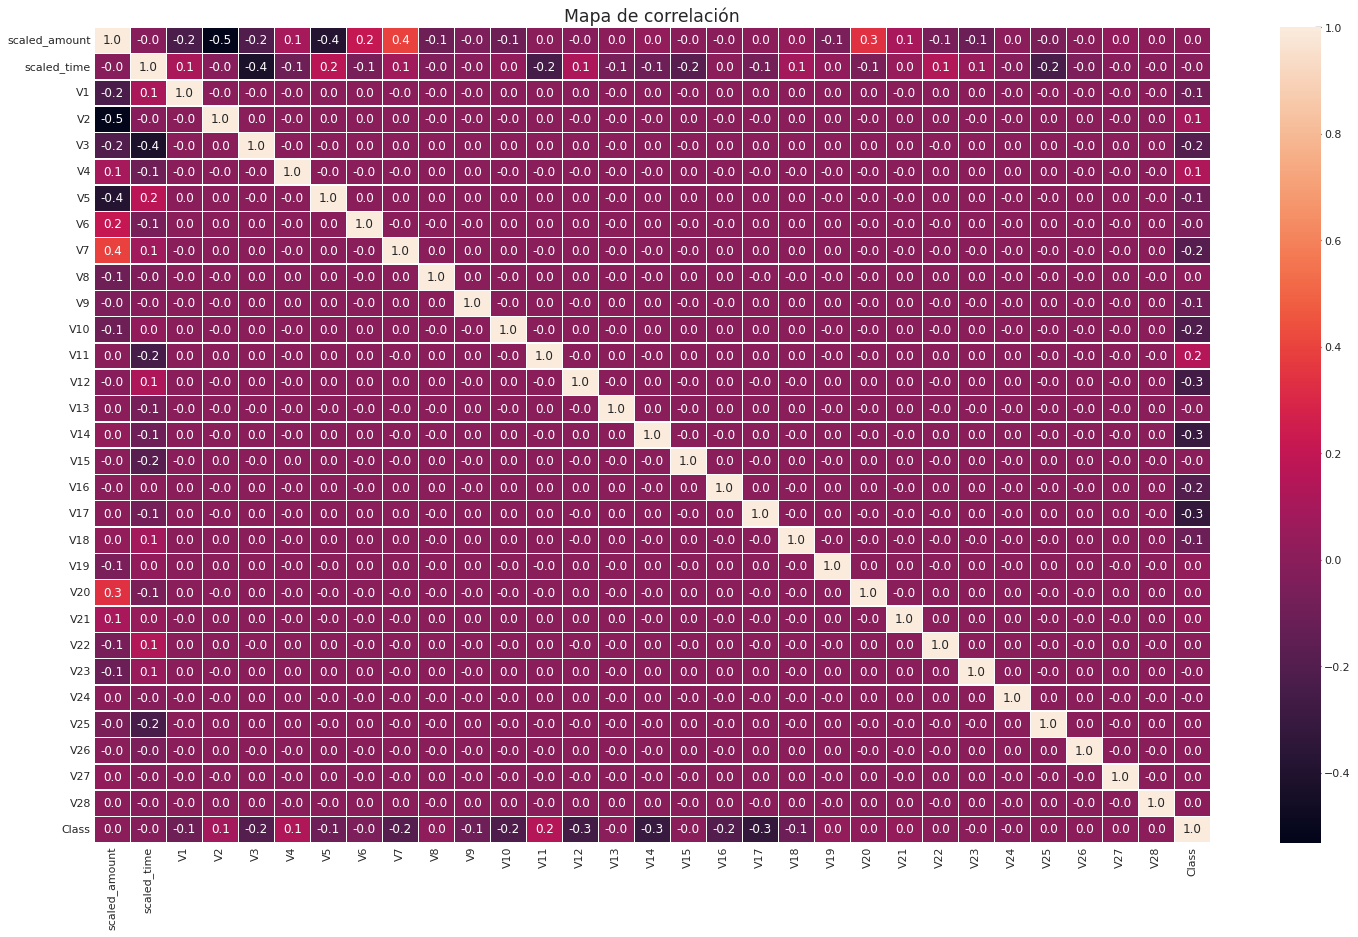

In [22]:
f,ax=plt.subplots(figsize = (25,15))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

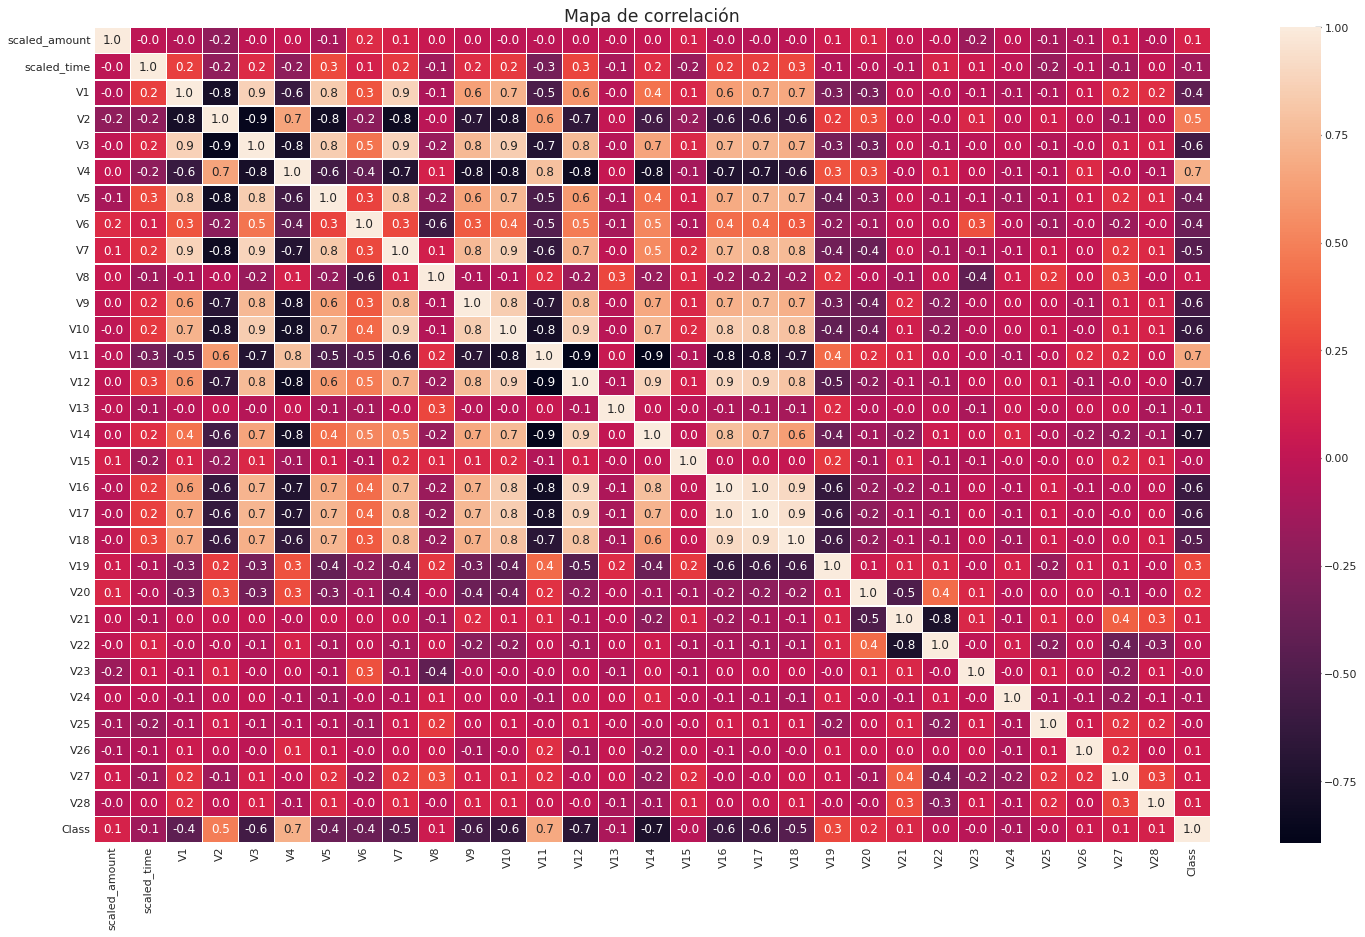

In [23]:
f,ax=plt.subplots(figsize = (25,15))
sns.heatmap(new_df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

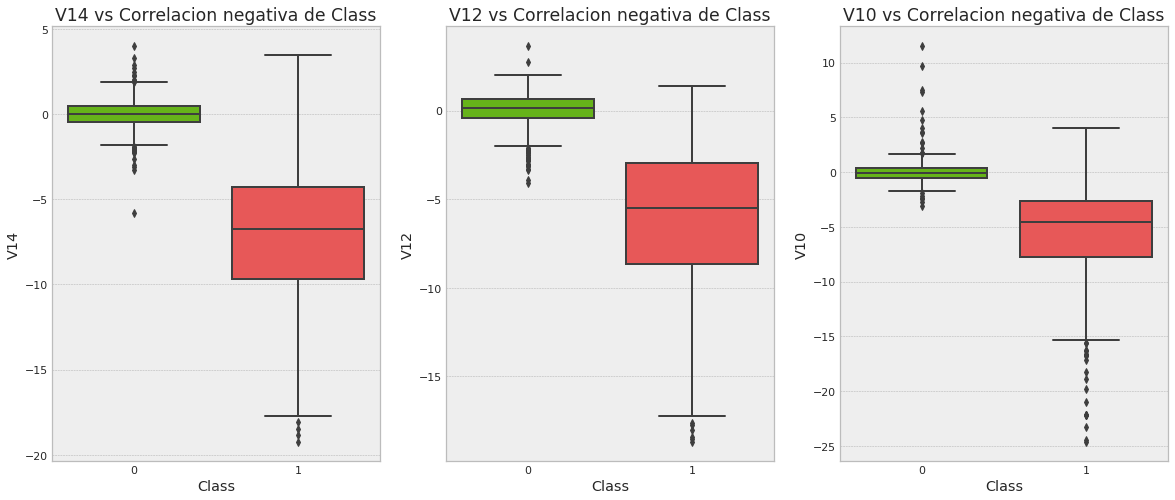

In [24]:
f, axes = plt.subplots(ncols=3, figsize=(20,8))

# Correlaciones negativas con nuestra clase (cuanto menor sea el valor de nuestra característica, más probable será una transacción fraudulenta)

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V14 vs Correlacion negativa de Class')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Correlacion negativa de Class')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V10 vs Correlacion negativa de Class')

plt.show()

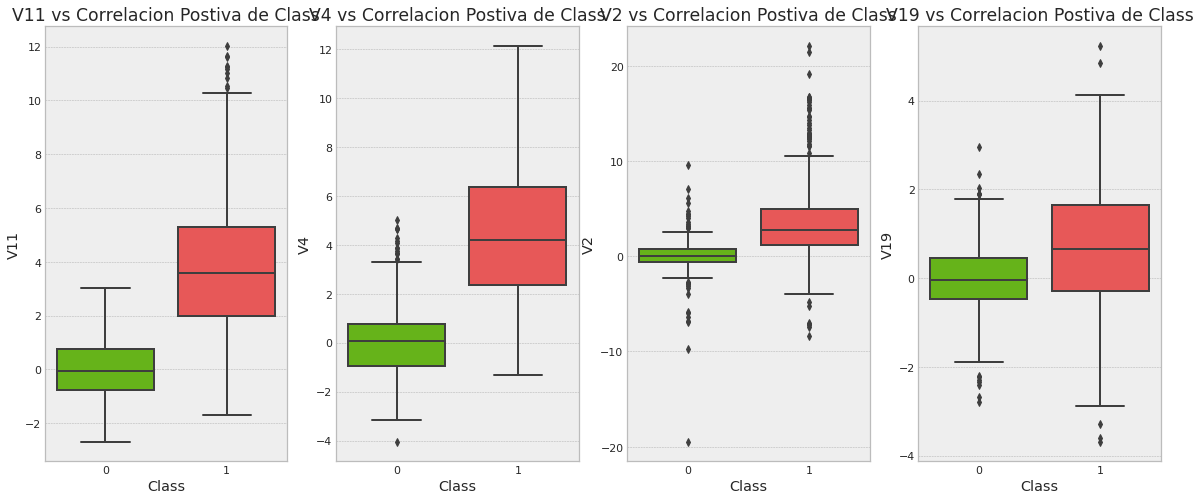

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,8))

# Correlaciones positivas (cuanto mayor sea la característica, aumenta la probabilidad de que sea una transacción fraudulenta)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Correlacion Postiva de Class')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Correlacion Postiva de Class')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Correlacion Postiva de Class')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Correlacion Postiva de Class')

plt.show()

### V.- Eliminacion de valores atipicos

**Detección de anomalías:**


*Nuestro principal objetivo en esta sección es eliminar los "valores atípicos extremos" de las características que tienen una alta correlación con nuestras clases. Esto tendrá un impacto positivo en la precisión de nuestros modelos.*



**Compensación de eliminación de valores atípicos:**

*Debemos tener cuidado en cuanto a qué tan lejos queremos el umbral para eliminar los valores atípicos. Determinamos el umbral multiplicando un número (por ejemplo: 1,5) por el (Rango intercuartílico). Cuanto más alto sea este umbral, menos valores atípicos detectará (multiplicando por un número más alto, por ejemplo: 3), y cuanto más bajo sea este umbral, más valores atípicos detectará.*


**La compensación:** cuanto más bajo sea el umbral, más valores atípicos eliminará; sin embargo, queremos centrarnos más en los "valores atípicos extremos" en lugar de solo en los valores atípicos. ¿Por qué? porque podríamos correr el riesgo de pérdida de información, lo que hará que nuestros modelos tengan una precisión menor. Puede jugar con este umbral y ver cómo afecta la precisión de nuestros modelos de clasificación.

**Resumen:**

**Visualizar distribuciones:** Primero comenzamos visualizando la distribución de la característica que vamos a usar para eliminar algunos de los valores atípicos. V14 es la única característica que tiene una distribución gaussiana en comparación con las características V12 y V10.
Determinación del umbral: después de decidir qué número usaremos para multiplicar con el iqr (los valores atípicos más bajos eliminados), procederemos a determinar los umbrales superior e inferior restando q25 - umbral (umbral del extremo inferior) y sumando q75 + umbral (umbral extremo superior).

**Descarte condicional:** 

Por último, creamos un descarte condicional que indica que si se excede el "umbral" en ambos extremos, las instancias serán eliminadas.
Representación de la gráfica de caja: visualice a través de la gráfica de caja que el número de "valores atípicos extremos" se ha reducido a una cantidad considerable.


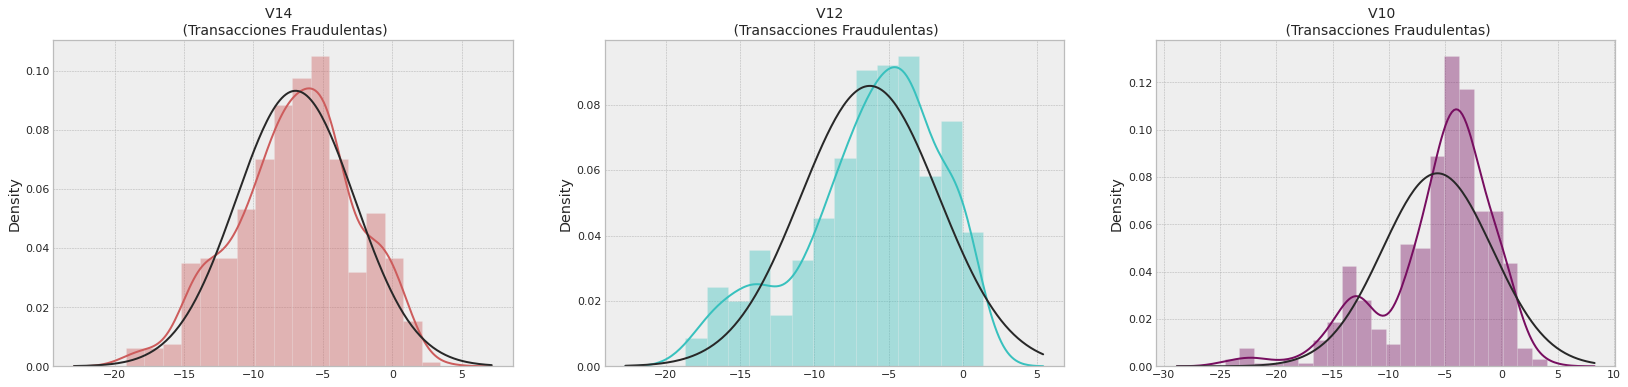

In [26]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(28, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#CD5C5C')
ax1.set_title('V14  \n (Transacciones Fraudulentas)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#38C1BE')
ax2.set_title('V12  \n (Transacciones Fraudulentas)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#770E60')
ax3.set_title('V10  \n (Transacciones Fraudulentas)', fontsize=14)

plt.show()

In [27]:
# # -----> Eliminación de valores atípicos (mayor correlación negativa con etiquetas)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Cuartil 25: {} | Cuartil 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Característica V14 valores atípicos para casos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Número de instancias después de la eliminación de valores atípicos: {}'.format(len(new_df)))
print('----' * 44)

# -----> V12 eliminando valores atípicos de transacciones fraudulentas
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Cuartil 25: {} | Cuartil 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Característica V12 valores atípicos para casos de fraude: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Número de instancias después de la eliminación de valores atípicos: {}'.format(len(new_df)))
print('----' * 44)


# V10 Eliminación de valores atípicos 
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Cuartil 25: {} | Cuartil 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Característica V10 valores atípicos para casos de fraude: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Número de instancias después de la eliminación de valores atípicos: {}'.format(len(new_df)))

Cuartil 25: -9.692722964972385 | Cuartil 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Característica V14 valores atípicos para casos de fraude: 4
V10 outliers:[-18.4937733551053, -18.8220867423816, -19.2143254902614, -18.049997689859396]
Número de instancias después de la eliminación de valores atípicos: 979
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cuartil 25: -8.67303320439115 | Cuartil 75: -2.893030568676315
iqr: 5.780002635714835
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.047596570821604, -18.553697009645802, -18.683714633344298]
Característica V12 valores atípicos para casos de fraude: 4
Número de instancias después de la eliminación de valores atípicos: 975
---------------------------------------------------

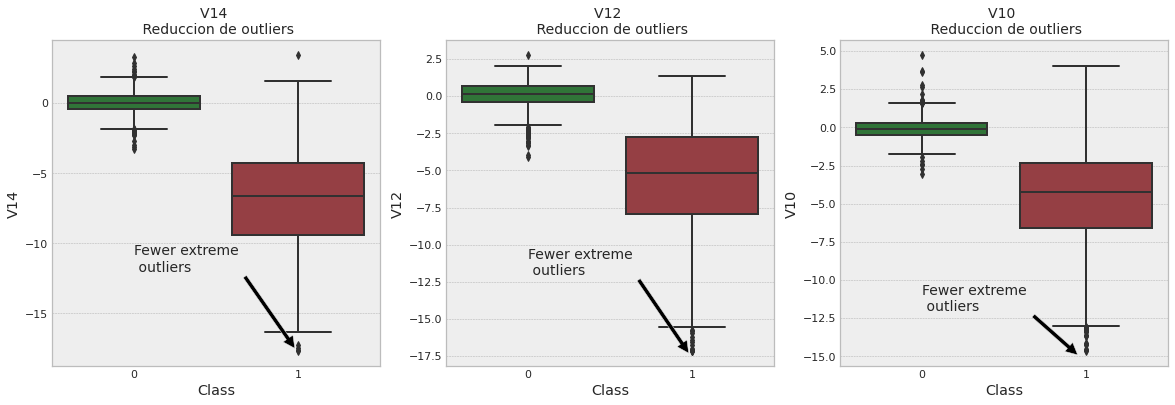

In [45]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#257F2F', '#A33138']
# Boxplots with outliers removed
# Variable V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 \n Reduccion de outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Variable 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 \n Reduccion de outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Variable V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 \n Reduccion de outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -14.9), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Validación de Modelos

### I.- Reducción de dimensionalidad y agrupación

**Entendiendo t-SNE:**

Para comprender este algoritmo, debe comprender los siguientes términos:

*   Distancia euclidiana
*   La probabilidad condicional
*   Gráficos de distribución normal y Distribucion t

 **Nota:** *Si desea un video instructivo simple, mire StatQuest: t-SNE, claramente explicado por Joshua Starmer*

**Resumen:**


*   El algoritmo t-SNE puede agrupar con bastante precisión los casos de fraude y no fraude en nuestro conjunto de datos.
Aunque la submuestra es bastante pequeña, el algoritmo t-SNE es capaz de detectar clústeres con bastante precisión en cada escenario (mezclo el conjunto de datos antes de ejecutar t-SNE)
*   Esto nos da una indicación de que los modelos predictivos adicionales funcionarán bastante bien para separar los casos de fraude de los casos que no lo son. 





In [29]:
# New_df es de los datos de submuestra aleatoria (menos instancias)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementacion
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE tomó {:.2} s".format(t1 - t0))

# PCA Implementacion
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA tomó {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD tomó {:.2} s".format(t1 - t0))

T-SNE tomó 6.5 s
PCA tomó 0.034 s
Truncated SVD tomó 0.0069 s


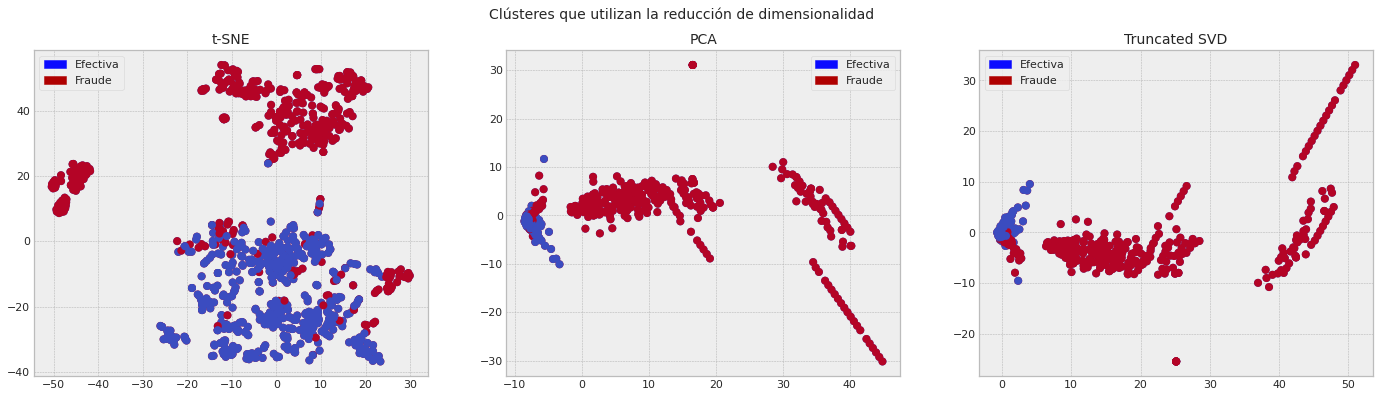

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['Efectiva, 'Fraude']
f.suptitle('Clústeres que utilizan la reducción de dimensionalidad', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Efectiva')
red_patch = mpatches.Patch(color='#AF0000', label='Fraude')


# t-SNE gráfico de dispersión
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Efectiva', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA gráfico de dispersión
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Efectiva', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD gráfico de dispersión
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Efectiva', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### II.- Validación de modelos de clasificacion

**Clasificadores (submuestreo):**

En esta sección, capacitaremos a cuatro tipos de clasificadores y decidiremos qué clasificador será más efectivo para detectar transacciones fraudulentas. Antes, tenemos que dividir nuestros datos en conjuntos de prueba y entrenamiento y separar las características de las etiquetas.

**Resumen:**


*   El clasificador de **regresión logística** es más preciso que los otros tres clasificadores en la mayoría de los casos. (Analizaremos más a fondo la regresión logística)
*   **GridSearchCV** se utiliza para determinar los parámetros que dan la mejor puntuación predictiva para los clasificadores.
*   La regresión logística tiene la mejor puntuación de característica operativa de recepción (ROC), lo que significa que la regresión logística separa con bastante precisión las transacciones fraudulentas y no fraudulentas.

Curvas de aprendizaje:

*   Cuanto mayor sea la brecha entre la puntuación de entrenamiento y la puntuación de validación cruzada, es más probable que su modelo se sobreajuste (alta varianza).
*   Si la puntuación es baja tanto en el entrenamiento como en los conjuntos de validación cruzada, esto es una indicación de que nuestro modelo no se adapta (sesgo alto)
*   El clasificador de regresión logística muestra la mejor puntuación tanto en el entrenamiento como en los conjuntos de validación cruzada.


In [31]:
# Submuestreo antes de la validación cruzada (propenso a sobrecargar)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [32]:
# Nuestros datos ya están escalados, deberíamos dividir nuestros conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Esto se usa explícitamente para submuestreo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Convierta los valores en una matriz para alimentar los algoritmos de clasificación.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [34]:
# Implementemos clasificadores simples

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [35]:
# Vaya, nuestros puntajes están obteniendo puntajes incluso altos incluso cuando se aplica la validación cruzada.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Clasificadores: ", classifier.__class__.__name__, "Tiene una puntuación de entrenamiento de", round(training_score.mean(), 2) * 100, "% de puntuación de precisión")

Clasificadores:  LogisticRegression Tiene una puntuación de entrenamiento de 94.0 % de puntuación de precisión
Clasificadores:  KNeighborsClassifier Tiene una puntuación de entrenamiento de 94.0 % de puntuación de precisión
Clasificadores:  SVC Tiene una puntuación de entrenamiento de 93.0 % de puntuación de precisión
Clasificadores:  DecisionTreeClassifier Tiene una puntuación de entrenamiento de 90.0 % de puntuación de precisión


In [36]:
# Utilice GridSearchCV para encontrar los mejores parámetros.
from sklearn.model_selection import GridSearchCV


# Regresion logistica
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Obtenemos automáticamente la regresión logística con los mejores parámetros.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# Mejor estimador de KNears
knears_neighbors = grid_knears.best_estimator_

# Clasificador de vectores de soporte
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# Mejor estimador de SVC
svc = grid_svc.best_estimator_

# Clasificador de árbol de decisión
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# mejor estimador de árboles
tree_clf = grid_tree.best_estimator_

In [37]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Puntuación de validación cruzada de regresión logística: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Puntaje de validación cruzada de Knears Neighbors', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Puntuación de validación cruzada del clasificador de vectores de soporte', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Puntuación de validación cruzada del clasificador DecisionTree', round(tree_score.mean() * 100, 2).astype(str) + '%')

Puntuación de validación cruzada de regresión logística:  94.17%
Puntaje de validación cruzada de Knears Neighbors 92.97%
Puntuación de validación cruzada del clasificador de vectores de soporte 94.17%
Puntuación de validación cruzada del clasificador DecisionTree 92.84%


In [38]:
# Submuestrearemos durante la validación cruzada
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementación de la técnica NearMiss 
# Distribución de NearMiss (Solo para ver cómo distribuye las etiquetas, no usaremos estas variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Validación cruzada de la manera correcta

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56953  56954  56955 ... 284804 284805 284806] Test: [    0     1     2 ... 62564 62983 63681]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56953  56954  56955 ... 113921 114035 114070]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113922 113923 113924 ... 175090 175531 175838]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170874 170875 170876 ... 233627 235505 235870]
Train: [     0      1      2 ... 233627 235505 235870] Test: [227835 227836 227837 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [39]:
# Tracemos la curva de aprendizaje de regresión logística
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Primer Estimador
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score de entrenamiento")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de Cross-validation")
    ax1.set_title("Curva de aprendizaje de regresión logística", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Segundo Estimador 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score de entrenamiento")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de Cross-validation")
    ax2.set_title("Curva de aprendizaje de Knears Neighbors", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Tercer Estimador
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score de entrenamiento")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de Cross-validation")
    ax3.set_title("Clasificador de vectores de soporte \n Curva de aprendizaje", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Cuarto Estimador
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score de entrenamiento")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de Cross-validation")
    ax4.set_title("Clasificador de árbol de decisión \n Curva de aprendizaje", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

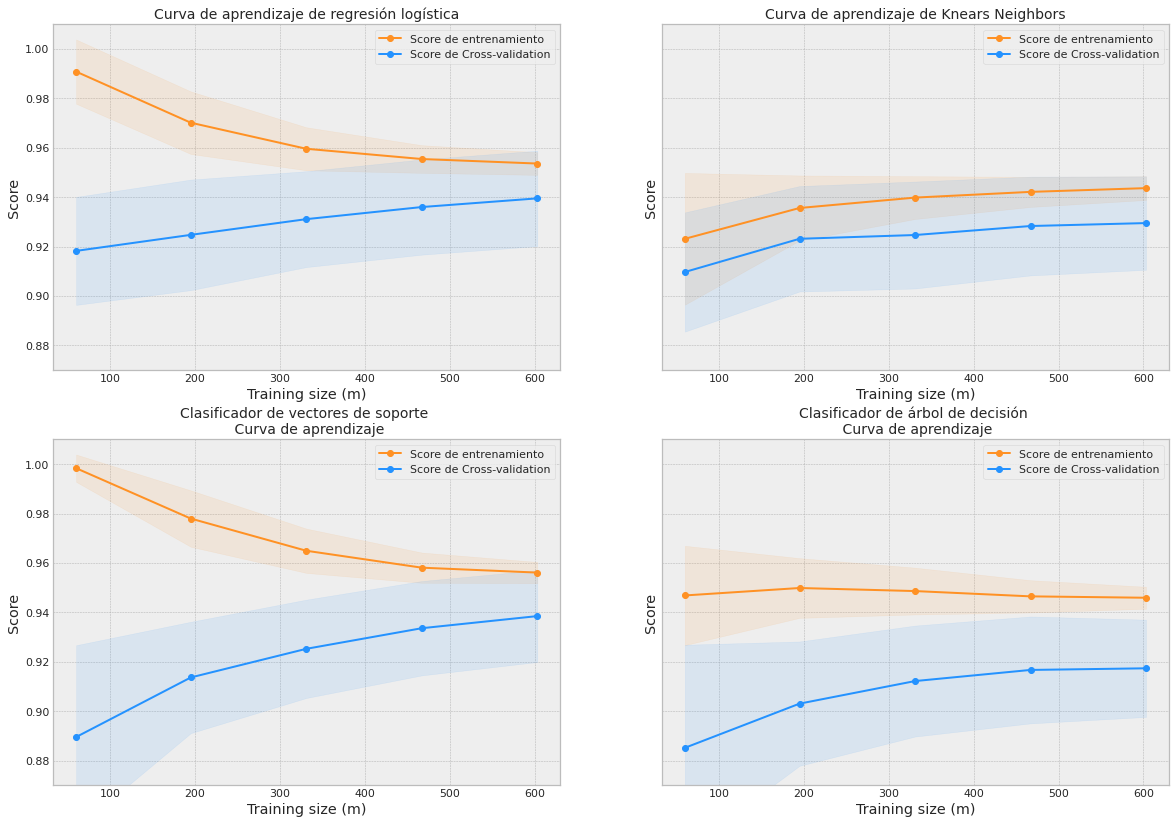

In [40]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [41]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Cree un DataFrame con todas las puntuaciones y los nombres de los clasificadores.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [42]:
from sklearn.metrics import roc_auc_score

print('Regresion logistica: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Clasificador de vectores de soporte: ', roc_auc_score(y_train, svc_pred))
print('Clasificador de árbol de decisión: ', roc_auc_score(y_train, tree_pred))

Regresion logistica:  0.9772299890833539
KNears Neighbors:  0.9278198401239568
Clasificador de vectores de soporte:  0.9771454731133571
Clasificador de árbol de decisión:  0.9272106208402296


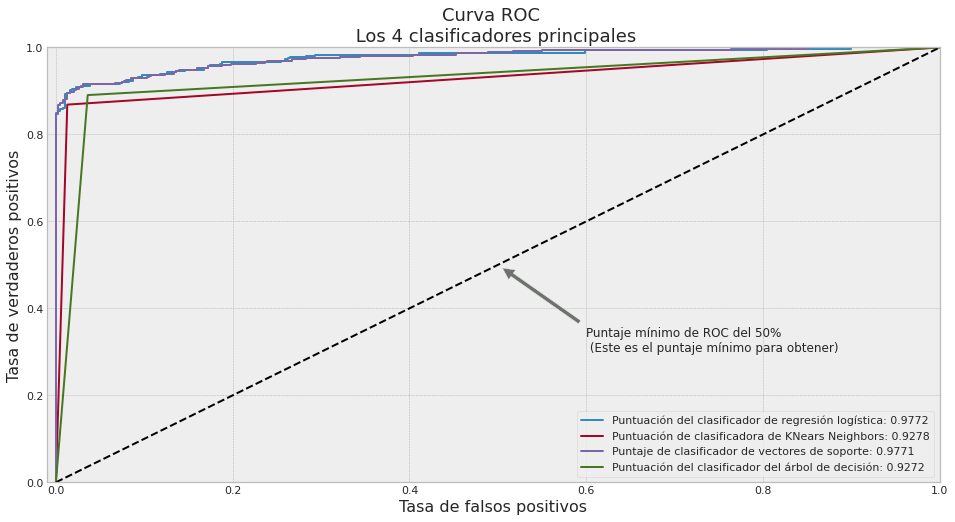

In [43]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Curva ROC \n Los 4 clasificadores principales', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Puntuación del clasificador de regresión logística: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='Puntuación de clasificadora de KNears Neighbors: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Puntaje de clasificador de vectores de soporte: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Puntuación del clasificador del árbol de decisión: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Tasa de falsos positivos', fontsize=16)
    plt.ylabel('Tasa de verdaderos positivos', fontsize=16)
    plt.annotate('Puntaje mínimo de ROC del 50% \n (Este es el puntaje mínimo para obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

**Una mirada más profunda a la regresión logística:**

En esta sección, analizaremos en profundidad **el clasificador de regresión logística.**


*   **Positivos verdaderos:** transacciones fraudulentas correctamente clasificadas
*   **Falsos positivos:** transacciones fraudulentas clasificadas incorrectamente
*   **Verdadero negativo:** transacciones no fraudulentas correctamente clasificadas
*   **Falso negativo:** transacciones no fraudulentas clasificadas incorrectamente
*   **Precisión:** verdaderos positivos / (verdaderos positivos + falsos positivos)
*   **Recordar:** verdaderos positivos / (verdaderos positivos + falsos negativos)
Precisión, como su nombre lo indica, dice cuán preciso (cuán seguro) es nuestro modelo para detectar transacciones fraudulentas, mientras que la recuperación es la cantidad de casos de fraude que nuestro modelo es capaz de detectar.
*   **Compensación de precisión / recuperación:** cuanto más preciso (selectivo) sea nuestro modelo, menos casos detectará. Ejemplo: Suponiendo que nuestro modelo tiene una precisión del 95%, digamos que solo hay 5 casos de fraude en los que el modelo tiene una precisión del 95% o más que estos son casos de fraude. Entonces digamos que hay 5 casos más que nuestro modelo considera que el 90% es un caso de fraude, si bajamos la precisión hay más casos que nuestro modelo podrá detectar.



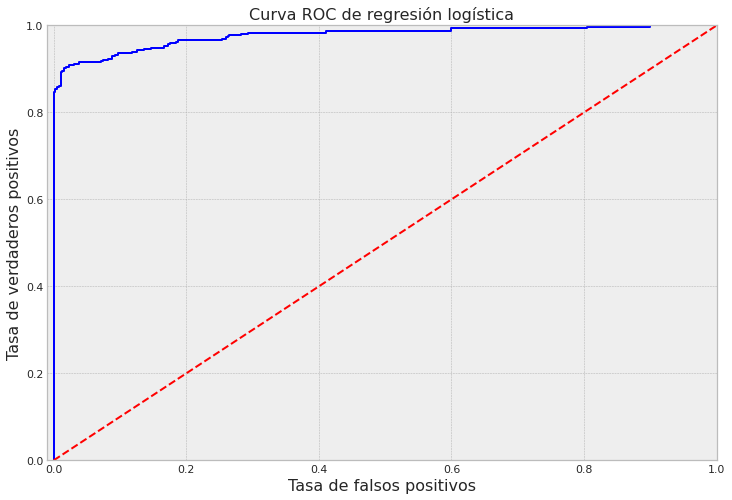

In [44]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Curva ROC de regresión logística', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Tasa de falsos positivos', fontsize=16)
    plt.ylabel('Tasa de verdaderos positivos', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

### III.- Conclusiones:

*   Trabajamos con nuestros datos sesgados o desequilibrados y los transformamos (realizamos submuestras y las escalamos) para poder verificar con mejor detalle las distribuciones y correlaciones de los datos
*   Eliminamos los valores atipicos de nuestra submuestra y con esta pudimos correlacionar con la variable class para encontrar las variables que nos serviran para el uso de tecnicas y modelos
*   Validamos los modelos más conocidos que se apegaban a nuestro objetivo teniendo buena respuesta de estos, pero siendo regresion logistica el de mayor precision a la hora de encontrar verdaderos positivos


**Nota:** En el siguiente paso validaremos un nuevo modelo que usa arboles de decision y regresión pues suele ser de gran impacto al momento de clasificar o detectar este tipo de casos (XGBoost)

